In [33]:
import pandas as pd
import numpy as np 
from glob import glob
import cv2
from skimage import io 
from tqdm import tqdm
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras import layers
import tensorflow.keras.optimizers as Optimizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)
import pandas as pd
import numpy as np 
from glob import glob
import cv2
from skimage import io 
from tqdm import tqdm
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras import layers
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input

In [15]:
ground_truth_df = pd.read_csv("ISIC_2019_Training_GroundTruth.csv")
meta_data_df = pd.read_csv("ISIC_2019_Training_Metadata.csv")
ground_truth_df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
cols=['NV','BCC','AK','BKL','DF','VASC','SCC','MEL', "UNK"]


In [17]:
for i in range(0, len(cols)):
    print("Total images of " + cols[i] + " : " + str(len(ground_truth_df[ground_truth_df[cols[i]]>0])))

Total images of NV : 12875
Total images of BCC : 3323
Total images of AK : 867
Total images of BKL : 2624
Total images of DF : 239
Total images of VASC : 253
Total images of SCC : 628
Total images of MEL : 4522
Total images of UNK : 0


In [13]:
meta_data_df

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [18]:
data_df= meta_data_df.merge(ground_truth_df, how= 'inner', on='image').sample(frac=1).reset_index(drop=True) #frac keyword speicifies the fraction of rows to return in the random sample so frac =1 meants to retuen all rows in random order
data_df

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0028244,50.0,lower extremity,HAM_0001533,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0026621,45.0,anterior torso,HAM_0001494,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0056055,30.0,anterior torso,BCN_0000099,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000251,50.0,posterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0060193,55.0,head/neck,BCN_0002963,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0055940,80.0,anterior torso,BCN_0001075,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0062750,55.0,lower extremity,BCN_0004304,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25328,ISIC_0059162,80.0,anterior torso,BCN_0004428,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0068863,35.0,head/neck,BCN_0005007,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


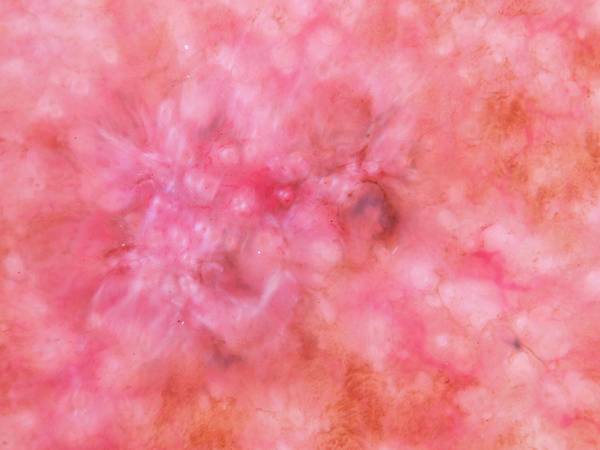

In [26]:
image.load_img("Image_dir_2/AK_images/ISIC_0024468.jpg")

# ResNet Model 1 - 8 Classes


In [90]:
CFG = dict(
        batch_size        =  16,     # 8; 16; 32; 64; bigger batch size => moemry allocation issue
        epochs            =  100,   # 5; 10; 20;
        verbose           =   1,    # 0; 1
        workers           =   4,    # 1; 2; 3
        optimizer         = 'adam', # 'SGD', 'RMSprop'

        RANDOM_STATE      =  123,   
    
        # Path to save a model
        path_model        = '../working/',

        # Images sizes
        img_size          = 224, 
        img_height        = 224, 
        img_width         = 224, 

        # Images augs
        ROTATION          = 180.0,
        ZOOM              =  10.0,
        ZOOM_RANGE        =  [0.9,1.1],
        HZOOM             =  10.0, #maybe try 8.0?
        WZOOM             =  10.0, #maybe try 8.0?
        HSHIFT            =  10.0, #maybe try 8.0?
        WSHIFT            =  10.0, #maybe try 8.0?
        SHEAR             =   5.0, #maybe try 2.0?
        HFLIP             = True,
        VFLIP             = True,

        # Postprocessing
        label_smooth_fac  =  0.00,  # 0.01; 0.05; 0.1; 0.2;     Label smoothing is used when the loss function is cross entropy, and the model applies the softmax function to the penultimate layer’s logit vectors z to compute its output probabilities p. 
)

In [91]:
training = image_dataset_from_directory("Image_dir_2",
                                       subset= "training",
                                       validation_split=.2,
                                       seed=10)
    
validation = image_dataset_from_directory("Image_dir_2",
                                       subset= "validation",
                                       validation_split=.2,
                                       seed=10)

#set up set of folders for training and validation 

Found 25331 files belonging to 8 classes.
Using 20265 files for training.
Found 25331 files belonging to 8 classes.
Using 5066 files for validation.


In [92]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
    rotation_range            = CFG['ROTATION'],
    zoom_range                = CFG['ZOOM_RANGE'],
    horizontal_flip           = CFG['HFLIP'],
    vertical_flip             = CFG['VFLIP'],
    height_shift_range        = CFG['HSHIFT'],
    width_shift_range         = CFG['WSHIFT'],
    shear_range               = CFG['SHEAR'],
    channel_shift_range       = 0.0,
    brightness_range          = None,
    fill_mode                 = 'nearest',                          
    )

valid_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)              # no aug for valid
test_generator  = ImageDataGenerator(rescale=1./255)                                    # no aug for test
# Train data
train_generator = train_datagen.flow_from_directory("Image_dir_2",
                                                    subset='training',                  # to read train/valid from same directory 
                                                    target_size=(CFG['img_size'], CFG['img_size']),
                                                    batch_size = CFG['batch_size'],
                                                    class_mode='categorical',
                                                    )

# Validation data
valid_generator = valid_generator.flow_from_directory("Image_dir_2",
                                                     subset='validation',               # to read train/valid from same directory 
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = CFG['batch_size'],
                                                     class_mode='categorical'
                                                     ) 
# Test data
test_generator  = test_generator.flow_from_directory("Image_dir_2",
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = 1,                    # using 1 to easily manage mapping between test_gen & pred
                                                     class_mode='categorical'
                                                     )

Found 17736 images belonging to 8 classes.
Found 7595 images belonging to 8 classes.
Found 25331 images belonging to 8 classes.


In [93]:
model_ResNet50 = tf.keras.Sequential([
     tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    ),
    
    GlobalAveragePooling2D(),
    
    #Dense(1024, activation = 'relu'), 
    #Dropout(0.5), 
    #BatchNormalization(),
    
    #Dense(256, activation='relu'), 
    #Dropout(0.3), 
    #BatchNormalization(),
    
    #Dense(64, activation='relu'), 
    #Dropout(0.2), 
    #BatchNormalization(),
    
    Dense(8, activation='softmax') # num classes = 9
    
])
    
model_ResNet50.compile(
    optimizer = CFG['optimizer'],
    loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = CFG['label_smooth_fac']),
    #loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [44]:
#tf.function-decorated function tried to create variables on non-first call'. 
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(#filepath=path_model,
                                   #filepath=CFG['path_model']+'ResNet50.hdf5'
                                   filepath = CFG['path_model']+'ResNet50-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history = model_ResNet50.fit(train_generator, 
                             epochs=CFG['epochs'], 
                             workers=CFG['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list,
                            )

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
1109/1109 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.5985
Epoch 00001: val_loss improved from inf to 0.31380, saving model to ../working/ResNet50-01-0.31.hdf5
1109/1109 [==============================] - 6548s 6s/step - loss: 0.2295 - accuracy: 0.5985 - val_loss: 0.3138 - val_accuracy: 0.4686
Epoch 2/100
1109/1109 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.6411
Epoch 00002: val_loss did not improve from 0.31380
1109/1109 [==============================] - 6977s 6s/step - loss: 0.2046 - accuracy: 0.6411 - val_loss: 0.7553 - val_accuracy: 0.5111
Epoch 3/100
1109/1109 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.6567
Epoch 00003: val_loss did not improve from 0.31380
1109/1109 [==============================] - 6998s 6s/step - loss: 0.1959 - accuracy: 0.6567 - val_loss: 0.4235 - val_accuracy: 0.5232
Epoch 4/100
1109/1109 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.6

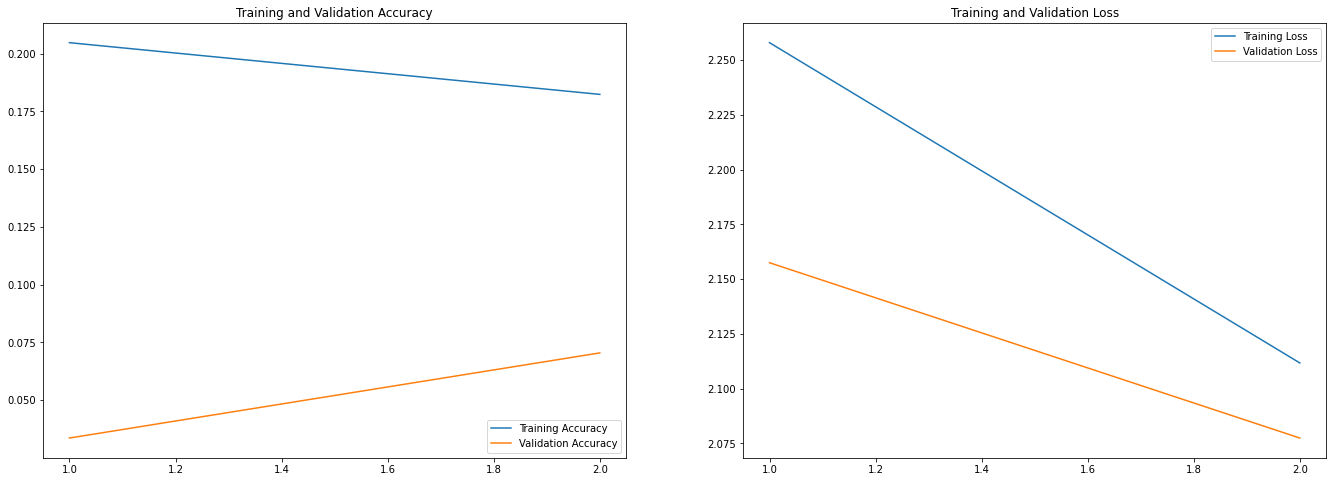

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

metrics = history.history['accuracy']
epochs_range = range(1, len(metrics) + 1) 

plt.figure(figsize=(23, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [89]:
from sklearn.metrics import classification_report,confusion_matrix
predictions1=model_ResNet50.predict(valid_generator,steps=len(valid_generator))
y=np.argmax(predictions1,axis=1)

print('Classification Report')
cr=classification_report(y_true=valid_generator.classes,y_pred=y,target_names=valid_generator.class_indices)
print(cr)
evaluates=model_ResNet50.evaluate(valid_generator)
print(evaluates)

Classification Report
              precision    recall  f1-score   support

   AK_images       0.00      0.00      0.00       260
  BCC_images       0.00      0.00      0.00       996
  BKL_images       0.00      0.00      0.00       787
   DF_images       0.01      1.00      0.02        71
  MEL_images       0.00      0.00      0.00      1356
   NV_images       0.00      0.00      0.00      3862
  SCC_images       0.00      0.00      0.00       188
 VASC_images       0.00      0.00      0.00        75

    accuracy                           0.01      7595
   macro avg       0.00      0.12      0.00      7595
weighted avg       0.00      0.01      0.00      7595



/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

180/238 [=====================>........] - ETA: 9:46 - loss: 2.5526 - accuracy: 0.0097

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
print('Confusion Matrix')
cm = confusion_matrix(valid_generator.classes,y)
df = pd.DataFrame(cm,columns=valid_generator.class_indices)
plt.figure(figsize=(10,7))
sn.heatmap(df,annot=True)

In [57]:
from sklearn.utils import class_weight
from collections import Counter
class_weights= class_weight.compute_class_weight(class_weight= "balanced",
                                    classes= np.unique(train_generator.classes),
                                    y=train_generator.classes)

unique_class_weights = np.unique(train_generator.classes)
class_weights_dict={unique_class_weights[i]: w for i,w in enumerate(class_weights)}

print('\nCLASS WEIGHTS: {}\n'.format(class_weights))
print(np.unique(train_generator.classes))
print(train_generator.classes)
print(unique_class_weights)
print(Counter(train_generator.classes).keys())   # equals to list(set(x))
print(Counter(train_generator.classes).values()) # counts the elements' frequency


CLASS WEIGHTS: [ 3.6523888   0.95272884  1.20685901 13.19642857  0.70025268  0.24597803
  5.03863636 12.45505618]

[0 1 2 3 4 5 6 7]
[0 0 0 ... 7 7 7]
[0 1 2 3 4 5 6 7]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7])
dict_values([607, 2327, 1837, 168, 3166, 9013, 440, 178])


# RESNET Model 2 with Class weights

In [ ]:
model_ResNet50_3 = tf.keras.Sequential([
     tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    ),
    
    GlobalAveragePooling2D(),
    
    Dense(1024, activation = 'relu'), 
    #Dropout(0.5), 
    BatchNormalization(),
    
    Dense(256, activation='relu'), 
    #Dropout(0.3), 
    BatchNormalization(),
    
    Dense(64, activation='relu'), 
    #Dropout(0.2), 
    BatchNormalization(),
    
    Dense(8, activation='softmax') # num classes = 8
    
])
    
model_ResNet50.compile(
    optimizer = "SGD",
    loss = "categorical_crossentropy",
    metrics=['accuracy']
)

In [72]:
#tf.function-decorated function tried to create variables on non-first call'. 
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(#filepath=path_model,
                                   #filepath=CFG['path_model']+'ResNet50.hdf5'
                                   filepath = CFG['path_model']+'ResNet50-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history = model_ResNet50.fit(train_generator, 
                             epochs=2, 
                             workers=CFG['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list,
                             class_weight = class_weights_dict
                            )

Epoch 1/2
1109/1109 [==============================] - ETA: 0s - loss: 2.2579 - accuracy: 0.2048 
Epoch 00001: val_loss improved from inf to 2.15747, saving model to ../working/ResNet50-01-2.16.hdf5
1109/1109 [==============================] - 21523s 19s/step - loss: 2.2579 - accuracy: 0.2048 - val_loss: 2.1575 - val_accuracy: 0.0336
Epoch 2/2
1109/1109 [==============================] - ETA: 0s - loss: 2.1117 - accuracy: 0.1824 
Epoch 00002: val_loss improved from 2.15747 to 2.07747, saving model to ../working/ResNet50-02-2.08.hdf5
1109/1109 [==============================] - 13178s 12s/step - loss: 2.1117 - accuracy: 0.1824 - val_loss: 2.0775 - val_accuracy: 0.0704


# ResNet Model 3

In [73]:
model_3_ResNet50 = tf.keras.Sequential([
     tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    ),
    
    GlobalAveragePooling2D(),
    
    Dense(1024, activation = 'relu'), 
    Dropout(0.5), 
    BatchNormalization(),
    
    Dense(256, activation='relu'), 
    Dropout(0.3), 
    BatchNormalization(),
    
    Dense(64, activation='relu'), 
    Dropout(0.2), 
    BatchNormalization(),
    
    Dense(8, activation='softmax') # num classes = 9
    
])
    
model_3_ResNet50.compile(
    optimizer = CFG['optimizer'],
    loss = "categorical_crossentropy",
    metrics=['accuracy']
)

In [74]:
#tf.function-decorated function tried to create variables on non-first call'. 
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(filepath = CFG['path_model']+'ResNet50_3-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history3 = model_3_ResNet50.fit(train_generator, 
                             epochs=CFG2['epochs'], 
                             workers=CFG['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list,
                            )

Epoch 1/2
1109/1109 [==============================] - ETA: 0s - loss: 1.6038 - accuracy: 0.4507 
Epoch 00001: val_loss improved from inf to 1.36151, saving model to ../working/ResNet50_3-01-1.36.hdf5
1109/1109 [==============================] - 12976s 12s/step - loss: 1.6038 - accuracy: 0.4507 - val_loss: 1.3615 - val_accuracy: 0.5089
Epoch 2/2
1109/1109 [==============================] - ETA: 0s - loss: 1.3470 - accuracy: 0.5085 
Epoch 00002: val_loss did not improve from 1.36151
1109/1109 [==============================] - 12656s 11s/step - loss: 1.3470 - accuracy: 0.5085 - val_loss: 1.3807 - val_accuracy: 0.5005


# ResNet Verison 4

In [84]:
CFG2 = dict(
        batch_size        =  32,     # 8; 16; 32; 64; bigger batch size => moemry allocation issue
        epochs            =  100,   # 5; 10; 20;
        verbose           =   1,    # 0; 1
        workers           =   4,    # 1; 2; 3
        optimizer         = 'adam', # 'SGD', 'RMSprop'

        RANDOM_STATE      =  123,   
    
        # Path to save a model
        path_model        = '../working/',

        # Images sizes
        img_size          = 224, 
        img_height        = 224, 
        img_width         = 224, 

        # Images augs
        ROTATION          = 180.0,
        ZOOM              =  10.0,
        ZOOM_RANGE        =  [0.9,1.1],
        HZOOM             =  8.0, #maybe try 8.0?
        WZOOM             =  8.0, #maybe try 8.0?
        HSHIFT            =  8.0, #maybe try 8.0?
        WSHIFT            =  8.0, #maybe try 8.0?
        SHEAR             =   2.0, #maybe try 2.0?
        HFLIP             = True,
        VFLIP             = True,

        # Postprocessing
        label_smooth_fac  =  0.05,  # 0.01; 0.05; 0.1; 0.2;     Label smoothing is used when the loss function is cross entropy, and the model applies the softmax function to the penultimate layer’s logit vectors z to compute its output probabilities p. 
)

#CHANGED ZOOM, SHift, smooth_fac and Batchsize

In [76]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
    rotation_range            = CFG2['ROTATION'],
    zoom_range                = CFG2['ZOOM_RANGE'],  #is for randomly zooming inside pictures  
    horizontal_flip           = CFG2['HFLIP'], #is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
    vertical_flip             = CFG2['VFLIP'],
    height_shift_range        = CFG2['HSHIFT'],
    width_shift_range         = CFG2['WSHIFT'],
    shear_range               = CFG2['SHEAR'], #randomly applying shearing transformations
    channel_shift_range       = 0.0,
    brightness_range          = None,
    fill_mode                 = 'nearest',      #is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift                     
    )

valid_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)              # no aug for valid
test_generator  = ImageDataGenerator(rescale=1./255)                                    # no aug for test
# Train data
train_generator = train_datagen.flow_from_directory("Image_dir_2",
                                                    subset='training',                  # to read train/valid from same directory 
                                                    target_size=(CFG2['img_size'], CFG2['img_size']),
                                                    batch_size = CFG2['batch_size'],
                                                    class_mode='categorical',
                                                    )

# Validation data
valid_generator = valid_generator.flow_from_directory("Image_dir_2",
                                                     subset='validation',               # to read train/valid from same directory 
                                                     target_size=(CFG2['img_size'], CFG2['img_size']),
                                                     batch_size = CFG2['batch_size'],
                                                     class_mode='categorical'
                                                     ) 
# Test data
test_generator  = test_generator.flow_from_directory("Image_dir_2",
                                                     target_size=(CFG2['img_size'], CFG2['img_size']),
                                                     batch_size = 1,                    # using 1 to easily manage mapping between test_gen & pred
                                                     class_mode='categorical'
                                                     )

Found 17736 images belonging to 8 classes.
Found 7595 images belonging to 8 classes.
Found 25331 images belonging to 8 classes.


In [77]:
model_4_ResNet50 = tf.keras.Sequential([
     tf.keras.applications.ResNet50(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    ),
    
    GlobalAveragePooling2D(),
    Dense(1024, activation = 'relu'), 
    Dense(256, activation='relu'), 
    Dense(64, activation='relu'), 
    Dense(8, activation='softmax') # num classes = 8
    
])
    
model_4_ResNet50.compile(
    optimizer = CFG2['optimizer'],
    loss = "categorical_crossentropy",
    metrics=['accuracy']
)

In [78]:
#tf.function-decorated function tried to create variables on non-first call'. 
tf.config.run_functions_eagerly(True) # otherwise error

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 10)
cb_checkpointer  = ModelCheckpoint(filepath = CFG['path_model']+'ResNet50_3-{epoch:02d}-{val_loss:.2f}.hdf5',
                                   monitor  = 'val_loss', 
                                   verbose  = CFG['verbose'], 
                                   save_best_only=True, 
                                   mode='min'
                                  )

callbacks_list = [cb_checkpointer, cb_early_stopper]

history3 = model_4_ResNet50.fit(train_generator, 
                             epochs=CFG2['epochs'], 
                             workers=CFG['workers'],
                             validation_data=valid_generator, 
                             callbacks = callbacks_list,
                            )

Epoch 1/2
555/555 [==============================] - ETA: 0s - loss: 1.4338 - accuracy: 0.5338 
Epoch 00001: val_loss improved from inf to 1.68471, saving model to ../working/ResNet50_3-01-1.68.hdf5
555/555 [==============================] - 17094s 31s/step - loss: 1.4338 - accuracy: 0.5338 - val_loss: 1.6847 - val_accuracy: 0.1311
Epoch 2/2
555/555 [==============================] - ETA: 0s - loss: 1.1141 - accuracy: 0.6142 
Epoch 00002: val_loss improved from 1.68471 to 1.25806, saving model to ../working/ResNet50_3-02-1.26.hdf5
555/555 [==============================] - 18985s 34s/step - loss: 1.1141 - accuracy: 0.6142 - val_loss: 1.2581 - val_accuracy: 0.5517
